# Bellman-Ford visualization

In this Notebook the NetworkX+graphblas-algorithms benchmark results from 6aBell-Ford.ipynb are visualized.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern']

In [3]:
def mean_std_max_min(series):
    print("%.2f" %series.mean())
    print("%.2f" %series.std())
    print("%.2f" %series.max())
    print("%.2f" %series.min())

In [6]:
sssp_df = pd.read_csv('data/bench/BF/nx-graphblas_20.csv',index_col=0)
sssp_df

source        time
0    3479549.0   39.025513
1   21304167.0    0.352677
2    3352393.0   97.153240
3   14032930.0   39.412374
4   12442273.0   22.337254
5   12950612.0   62.551116
6   21020546.0    5.812604
7    8356414.0   44.475672
8   14690824.0   68.699082
9    7175328.0   67.910884
10   1327363.0  107.602734
11  14786436.0   53.882840
12  21855790.0    0.063057
13   4971225.0   30.877160
14  14537479.0   61.694656
15  11586693.0   59.075473
16  20174361.0   14.635464
17  13779744.0   40.630121
18  15337593.0   66.121314
19  10178558.0   12.146802

In [7]:
mean_std_max_min(sssp_df.time)

44.72
30.25
107.60
0.06


In [4]:
sssp_mem_df = pd.read_csv('data/bench/BF/nx-graphblas_mem_20.csv',index_col=0)
sssp_mem_df

source        time     peak_mem      cur_mem
0    6969005.0   36.197587  127169270.0  115267585.0
1   17726015.0   21.759761  234406051.0  115266809.0
2    6877521.0   72.045617  241856267.0  115266119.0
3   20047694.0   19.296425  126457453.0  115266298.0
4   22013406.0    0.446838    1341566.0     626563.0
5    6239565.0   73.246229  250393902.0  115264608.0
6    3506903.0   30.168621  126936674.0  115264390.0
7   15808398.0   44.269453  236918585.0  115265030.0
8   15624782.0    4.201366  126472530.0  115263534.0
9    6702569.0   39.184318  126915116.0  115264639.0
10  18749708.0   31.197859  129994457.0  115264642.0
11   7129712.0   92.123729  253241114.0  115265254.0
12  21309637.0    5.840316   13281260.0    2854949.0
13  19008137.0   37.808382  130148670.0  115264695.0
14  15795875.0   34.477655  131404437.0  115264653.0
15   5259012.0  113.742005  250251540.0  115265019.0
16  13963307.0   88.023360  239709831.0  115265148.0
17   7862914.0  110.324042  239343532.0  115265014.0
18  13967444.0  106.816849  240660705.0  115266867.0
19  15144735.0   36.450813  235616141.0  115265718.0

In [9]:
mean_std_max_min(sssp_mem_df.time)

49.88
36.33
113.74
0.45


In [13]:
mean_std_max_min(sssp_mem_df.peak_mem*10**(-6))

173.13
79.28
253.24
1.34


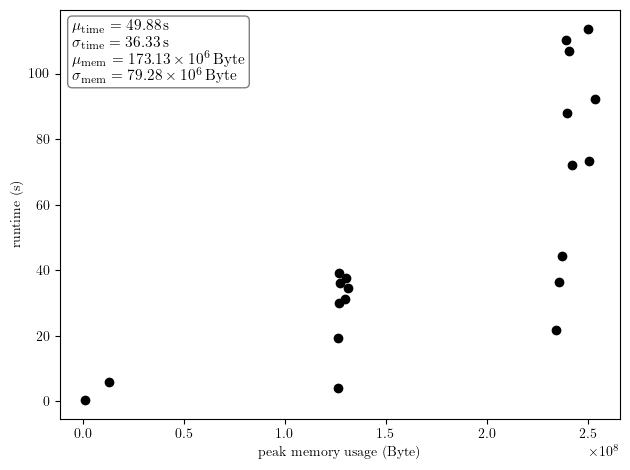

In [30]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'peak memory usage (Byte)')
ax1.set_ylabel(r'runtime (s)')
ax1.plot(sssp_mem_df.peak_mem, sssp_mem_df.time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')

text=  (r'\noindent $\mu_{\mathrm{time}} = 49.88 \, \mathrm{s} \newline$'
        r'$\sigma_{\mathrm{time}} = 36.33  \, \mathrm{s} \newline$'
        r'$\mu_{\mathrm{mem}} = 173.13 \times 10^6 \, \mathrm{Byte} \newline$'
        r'$\sigma_{\mathrm{mem}} = 79.28  \times 10^6 \, \mathrm{Byte} \newline$')

ax1.text(0.33, 0.95, text, fontsize=11, bbox=dict(boxstyle='round', fc='white', ec='black',alpha=0.5), transform=ax1.transAxes, horizontalalignment='right')
fig.tight_layout()
plt.savefig('data/vis/BF/nx-graphblas_20_mem-t_outl.pdf', format='pdf')
plt.show()

In [5]:
sssp_mem_df.drop([4,12])

source        time     peak_mem      cur_mem
0    6969005.0   36.197587  127169270.0  115267585.0
1   17726015.0   21.759761  234406051.0  115266809.0
2    6877521.0   72.045617  241856267.0  115266119.0
3   20047694.0   19.296425  126457453.0  115266298.0
5    6239565.0   73.246229  250393902.0  115264608.0
6    3506903.0   30.168621  126936674.0  115264390.0
7   15808398.0   44.269453  236918585.0  115265030.0
8   15624782.0    4.201366  126472530.0  115263534.0
9    6702569.0   39.184318  126915116.0  115264639.0
10  18749708.0   31.197859  129994457.0  115264642.0
11   7129712.0   92.123729  253241114.0  115265254.0
13  19008137.0   37.808382  130148670.0  115264695.0
14  15795875.0   34.477655  131404437.0  115264653.0
15   5259012.0  113.742005  250251540.0  115265019.0
16  13963307.0   88.023360  239709831.0  115265148.0
17   7862914.0  110.324042  239343532.0  115265014.0
18  13967444.0  106.816849  240660705.0  115266867.0
19  15144735.0   36.450813  235616141.0  115265718.0

In [6]:
mean_std_max_min(sssp_mem_df.drop([4,12]).time)

55.07
34.48
113.74
4.20


In [7]:
mean_std_max_min(sssp_mem_df.drop([4,12]).peak_mem*10**(-6))

191.55
58.53
253.24
126.46


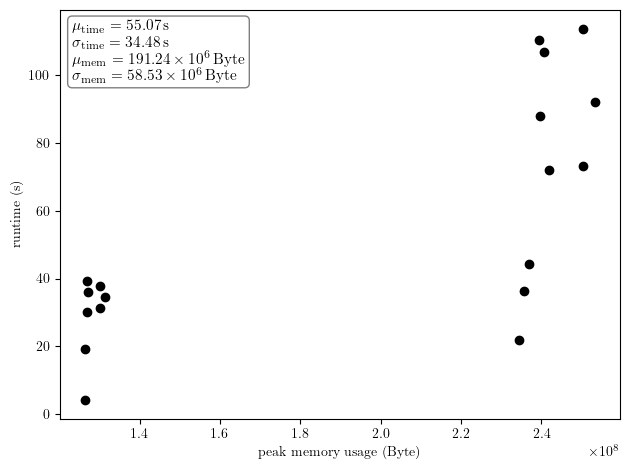

In [8]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'peak memory usage (Byte)')
ax1.set_ylabel(r'runtime (s)')
ax1.plot(sssp_mem_df.drop([4,12]).peak_mem, sssp_mem_df.drop([4,12]).time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')

text=  (r'\noindent $\mu_{\mathrm{time}} = 55.07 \, \mathrm{s} \newline$'
        r'$\sigma_{\mathrm{time}} = 34.48  \, \mathrm{s} \newline$'
        r'$\mu_{\mathrm{mem}} = 191.24 \times 10^6 \, \mathrm{Byte} \newline$'
        r'$\sigma_{\mathrm{mem}} = 58.53 \times 10^6 \, \mathrm{Byte} \newline$')

ax1.text(0.33, 0.95, text, fontsize=11, bbox=dict(boxstyle='round', fc='white', ec='black',alpha=0.5), transform=ax1.transAxes, horizontalalignment='right')
fig.tight_layout()
plt.savefig('data/vis/BF/nx-graphblas_20_mem-t.pdf', format='pdf')
plt.show()